In [1]:
#tryout
"""
Asian Football Confederation (AFC): 47 members
Confederation of African Football (CAF): 54 members
Confederation of North, Central American and Caribbean Association Football (CONCACAF): 41 members
Confederación Sudamericana de Fútbol (CONMEBOL): 10 members
Oceania Football Confederation (OFC): 13 members
Union of European Football Associations (UEFA): 55 members
"""


'\nAsian Football Confederation (AFC): 47 members\nConfederation of African Football (CAF): 54 members\nConfederation of North, Central American and Caribbean Association Football (CONCACAF): 41 members\nConfederación Sudamericana de Fútbol (CONMEBOL): 10 members\nOceania Football Confederation (OFC): 13 members\nUnion of European Football Associations (UEFA): 55 members\n'

In [2]:
afc_countries = [
    "Afghanistan", "Australia", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam",
    "Cambodia", "China", "Chinese Taipei", "Guam", "Hong Kong", "India",
    "Indonesia", "Iran", "Iraq", "Japan", "Jordan", "North Korea", "South Korea",
    "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Macau", "Malaysia", "Maldives",
    "Mongolia", "Myanmar", "Nepal", "Oman", "Pakistan", "Palestine", "Philippines",
    "Qatar", "Saudi Arabia", "Singapore", "Sri Lanka", "Syria", "Tajikistan",
    "Thailand", "Timor-Leste", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]


In [3]:
caf_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde",
    "Central African Republic", "Chad", "Comoros", "Republic of the Congo", "Democratic Republic of the Congo", "Djibouti", "Egypt",
    "Equatorial Guinea", "Eswatini", "Ethiopia", "Gabon", "The Gambia", "Ghana", "Guinea",
    "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi",
    "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria",
    "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone", "South Africa",
    "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe", "Somalia"
]


In [4]:
concacaf_countries = [
    "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba",
    "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica", "Mexico", "Montserrat", "Nicaragua", "Panama", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States",
    "Anguilla", "Aruba", "Bermuda", "British Virgin Islands", "Cayman Islands",
    "Curaçao", "Suriname", "Turks and Caicos Islands", "United States Virgin Islands", "Puerto Rico"
]


In [5]:
conmebol_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Peru",
    "Suriname", "Uruguay", "Venezuela"
]


In [6]:
ofc_countries = [
    "American Samoa", "Cook Islands", "Fiji", "New Caledonia", "New Zealand", "Papua New Guinea",
    "Samoa", "Solomon Islands", "Tahiti", "Tonga", "Vanuatu"
]


In [7]:
uefa_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia-Herzegovina",
    "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "England", "Estonia", "Faroe Islands",
    "Finland", "France", "Georgia", "Germany", "Gibraltar", "Greece", "Hungary", "Iceland",
    "Israel", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg",
    "Malta", "Moldova", "Montenegro", "Netherlands", "North Macedonia", "Northern Ireland", "Norway",
    "Poland", "Portugal", "Republic of Ireland", "Romania", "Russia", "San Marino", "Scotland", "Serbia",
    "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkiye", "Ukraine", "Wales"
]


In [8]:
import pandas as pd

# Combine all country lists
all_countries_MO = afc_countries + caf_countries + concacaf_countries + conmebol_countries + ofc_countries + uefa_countries

# Sort the countries alphabetically
all_countries_sorted = sorted(all_countries_MO)

# Create a DataFrame
FIFA = pd.DataFrame({
    'Nr.': range(1, len(all_countries_sorted) + 1),
    'Country': all_countries_sorted
})

print(FIFA)

     Nr.         Country
0      1     Afghanistan
1      2         Albania
2      3         Algeria
3      4  American Samoa
4      5         Andorra
..   ...             ...
205  206         Vietnam
206  207           Wales
207  208           Yemen
208  209          Zambia
209  210        Zimbabwe

[210 rows x 2 columns]


In [9]:
#importing our second dataset from Transfermarekt website through webscrappein
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Base URL of the Transfermarkt rankings page
url_base = "https://www.transfermarkt.com/statistik/weltrangliste?page="

# Set up headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# List to hold data from all pages
all_data = []

# Loop through pages 1 to 9 (since there are 9 pages in total)
for page in range(1, 10):  # Scraping 9 pages
    print(f"Scraping page {page}...")
    
    # Send a request to the webpage with the custom header
    response = requests.get(url_base + str(page), headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        print(f"Page {page} loaded successfully!")
        
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the table containing the rankings (this can be adjusted if the page structure changes)
        table = soup.find('table', {'class': 'items'})  # Look for the table with class "items"
        
        # Extract the rows (data) of the table
        rows = table.find_all('tr')[1:]  # Skip the header row
        
        # Loop through each row and extract the columns
        for row in rows:
            columns = row.find_all('td')
            
            # Extract the relevant data from each column and clean it
            rank = columns[0].text.strip()
            nation = columns[1].find('img')['alt'] if columns[1].find('img') else columns[1].text.strip()
            squad_size = columns[2].text.strip()
            avg_age = columns[3].text.strip()
            total_value = columns[4].text.strip()
            confederation = columns[5].text.strip()
            points = columns[6].text.strip()
            
            # Add the data to the list
            all_data.append([rank, nation, squad_size, avg_age, total_value, confederation, points])
    else:
        print(f"Failed to retrieve page {page}. Status code: {response.status_code}")

# Create a pandas DataFrame from the extracted data with the correct headers
headers = ['Rank', 'Nation', 'Squad Size', 'Avg Age', 'Total Value', 'Confederation', 'Points']
df = pd.DataFrame(all_data, columns=headers)

# Clean the "Rank" column: remove non-numeric characters (if any)
df['Rank'] = df['Rank'].str.extract('(\d+)').astype(int)

# Convert "Points" to numeric (integer)
df['Points'] = pd.to_numeric(df['Points'], errors='coerce', downcast='integer')

# Convert "Avg Age" to float
df['Avg Age'] = pd.to_numeric(df['Avg Age'], errors='coerce')

# Clean "Total Value" column by removing non-numeric characters (€, commas, 'm', 'k', and 'b')
def clean_total_value(value):
    # If the value is '-', replace with NaN
    if value == '-':
        return np.nan
    
    # Remove commas, '€', and strip leading/trailing spaces
    value = value.replace('€', '').replace(',', '').strip()
    
    # Handle 'm' for millions
    if 'm' in value.lower():
        value = value.replace('m', '').strip()
        return float(value) * 1e6  # Convert to millions (multiply by 1,000,000)
    
    # Handle 'b' for billions
    elif 'b' in value.lower():
        value = value.replace('b', '').strip()
        return float(value) * 1e9  # Convert to billions (multiply by 1,000,000,000)
    
    # Handle 'k' for thousands
    elif 'k' in value.lower():
        value = value.replace('k', '').strip()
        return float(value) * 1e3  # Convert to thousands (multiply by 1,000)
    
    # Otherwise, return the value as is (if it's just a plain number)
    return float(value)

# Apply the function to clean the "Total Value" column
df['Total Value'] = df['Total Value'].apply(clean_total_value)

# Convert "Squad Size" to numeric (integer)
df['Squad Size'] = pd.to_numeric(df['Squad Size'], errors='coerce', downcast='integer')

# Convert "Confederation" to object (string), ensuring no unexpected values
df['Confederation'] = df['Confederation'].astype(str)

# Ensure that the correct data types are set
print(f"Data types:\n{df.dtypes}")

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())

# Save the cleaned DataFrame to a CSV file
#df.to_csv('transfermarkt_rankings.csv', index=False)


<>:61: SyntaxWarning: invalid escape sequence '\d'
<>:61: SyntaxWarning: invalid escape sequence '\d'
/var/folders/l4/g8j3y_vx0pq5tl_95dwxp9hr0000gp/T/ipykernel_33954/29973502.py:61: SyntaxWarning: invalid escape sequence '\d'
  df['Rank'] = df['Rank'].str.extract('(\d+)').astype(int)


Scraping page 1...
Page 1 loaded successfully!
Scraping page 2...
Page 2 loaded successfully!
Scraping page 3...
Page 3 loaded successfully!
Scraping page 4...
Page 4 loaded successfully!
Scraping page 5...
Page 5 loaded successfully!
Scraping page 6...
Page 6 loaded successfully!
Scraping page 7...
Page 7 loaded successfully!
Scraping page 8...
Page 8 loaded successfully!
Scraping page 9...
Page 9 loaded successfully!
Data types:
Rank               int64
Nation            object
Squad Size          int8
Avg Age          float64
Total Value      float64
Confederation     object
Points             int16
dtype: object
Cleaned DataFrame:
   Rank     Nation  Squad Size  Avg Age  Total Value Confederation  Points
0     1  Argentina          25     27.5  716500000.0      CONMEBOL    1867
1     2     France          23     26.8  978000000.0          UEFA    1860
2     3      Spain          24     25.9  890000000.0          UEFA    1853
3     4    England          23     25.4  995000000.0     

In [10]:
df.head()

,Rank,Nation,Squad Size,Avg Age,Total Value,Confederation,Points
0,1,Argentina,25,27.5,716500000.0,CONMEBOL,1867
1,2,France,23,26.8,978000000.0,UEFA,1860
2,3,Spain,24,25.9,890000000.0,UEFA,1853
3,4,England,23,25.4,995000000.0,UEFA,1814
4,5,Brazil,23,27.0,921800000.0,CONMEBOL,1776


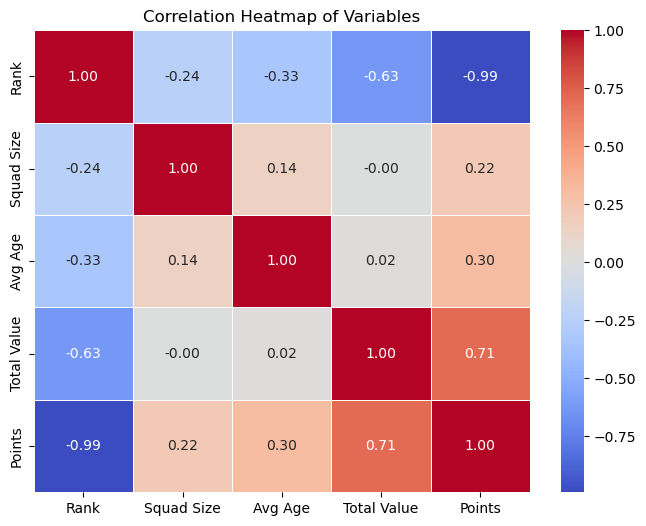

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset (Replace this with your actual dataset)
#data = pd.read_csv("your_dataset.csv")  # Load your dataset

# Selecting numerical columns for correlation (excluding categorical variables like Nation, Confederation)
num_columns = ["Rank", "Squad Size", "Avg Age", "Total Value", "Points"]
df_numeric = df[num_columns]

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Variables")
plt.show()


In [25]:
#remoing the columns that we dont need!
transfer_market_25 = df.drop(columns=['Squad Size', 'Avg Age','Total Value'])

In [27]:
transfer_market_25

,Rank,Nation,Confederation,Points
0,1,Argentina,CONMEBOL,1867
1,2,France,UEFA,1860
2,3,Spain,UEFA,1853
3,4,England,UEFA,1814
4,5,Brazil,CONMEBOL,1776
...,...,...,...,...
205,206,Turks and Caicos Islands,CONCACAF,804
206,207,British Virgin Islands,CONCACAF,780
207,208,United States Virgin Islands,CONCACAF,780
208,209,Anguilla,CONCACAF,769


In [29]:
transfer_market_25.nunique()

Rank             210
Nation           210
Confederation      6
Points           193
dtype: int64

In [31]:
import pandas as pd


# Read the FIFA.csv file into a DataFrame
fifa_TP = pd.read_excel('123.xlsx')

# Display the first few rows of the DataFrame
print(fifa_TP.head())


           Nation  Pro    All
0     Afghanistan  NON    NON
1         Albania  NaN  17500
2         Algeria  NON    NON
3  American Samoa  NON    NON
4         Andorra  NON    NON


In [33]:
# Combine the two data frames next to each other
combined_df = pd.concat([transfer_market_25, fifa_TP], axis=1)

# Display the combined data frame
print(combined_df)

     Rank                        Nation Confederation  Points          Nation  \
0       1                     Argentina      CONMEBOL    1867     Afghanistan   
1       2                        France          UEFA    1860         Albania   
2       3                         Spain          UEFA    1853         Algeria   
3       4                       England          UEFA    1814  American Samoa   
4       5                        Brazil      CONMEBOL    1776         Andorra   
..    ...                           ...           ...     ...             ...   
205   206      Turks and Caicos Islands      CONCACAF     804         Somalia   
206   207        British Virgin Islands      CONCACAF     780        Tanzania   
207   208  United States Virgin Islands      CONCACAF     780    Turkmenistan   
208   209                      Anguilla      CONCACAF     769       Venezuela   
209   210                    San Marino          UEFA     747             NaN   

     Pro    All  
0    NON 

In [35]:
# Combine the two data frames on the 'Nation' column
combined_df = pd.merge(fifa_TP, transfer_market_25, on='Nation', how='inner')

# Display the combined data frame
print(combined_df)

             Nation  Pro    All  Rank Confederation  Points
0       Afghanistan  NON    NON   156           AFC    1025
1           Albania  NaN  17500    65          UEFA    1376
2           Algeria  NON    NON    37           CAF    1496
3    American Samoa  NON    NON   187           OFC     883
4           Andorra  NON    NON   171          UEFA     972
..              ...  ...    ...   ...           ...     ...
204     Puerto Rico  NON    NON   157      CONCACAF    1023
205         Somalia  NON    NON   202           CAF     830
206        Tanzania  NON    NON   106           CAF    1199
207    Turkmenistan  NON    NON   143           AFC    1065
208       Venezuela  NON    NON    47      CONMEBOL    1476

[209 rows x 6 columns]


In [37]:
combined_df_sorted = combined_df.sort_values(by='Rank')
print(combined_df_sorted)

                           Nation   Pro       All  Rank Confederation  Points
8                       Argentina   NaN   4928574     1      CONMEBOL    1867
68                         France  4000   2200000     2          UEFA    1860
173                         Spain  8560   4107300     3          UEFA    1853
60                        England  5582  11800000     4          UEFA    1814
27                         Brazil   NaN   2000000     5      CONMEBOL    1776
..                            ...   ...       ...   ...           ...     ...
190      Turks and Caicos Islands   NON       NON   206      CONCACAF     804
28         British Virgin Islands   NON       NON   207      CONCACAF     780
195  United States Virgin Islands   NaN       NaN   208      CONCACAF     780
6                        Anguilla   NON       NON   209      CONCACAF     769
160                    San Marino   NON       NON   210          UEFA     747

[209 rows x 6 columns]


In [40]:
import requests
import pandas as pd
# List of countries you’re interested in
countries = ["Afghanistan", "Albania", "Algeria", "American Samoa", "Andorra", "Angola",
 "Anguilla", "Antigua and Barbuda", "Argentina", "Armenia", "Aruba", "Australia",
 "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados",
 "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia",
 "Bosnia-Herzegovina", "Botswana", "Brazil", "British Virgin Islands",
 "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia",
 "Cameroon", "Canada", "Cape Verde", "Cayman Islands", "Central African Republic",
 "Chad", "Chile", "China", "Chinese Taipei", "Colombia", "Comoros",
 "Republic of the Congo", "Democratic Republic of the Congo", "Cook Islands",
 "Costa Rica", "Croatia", "Cuba", "Curaçao", "Cyprus", "Czech Republic",
 "Denmark", "Djibouti", "Dominican Republic", "Ecuador", "Egypt", "El Salvador",
 "England", "Equatorial Guinea", "Estonia", "Eswatini", "Ethiopia", "Faroe Islands",
 "Fiji", "Finland", "France", "Gabon", "The Gambia", "Georgia", "Germany",
 "Ghana", "Gibraltar", "Greece", "Grenada", "Guam", "Guatemala", "Guinea",
 "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong", "Hungary", "Iran",
 "Iceland", "India", "Indonesia", "Iraq", "Republic of Ireland", "Israel", "Italy",
 "Ivory Coast", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "North Korea",
 "South Korea", "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon",
 "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Macau",
 "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Mauritania",
 "Mauritius", "Mexico", "Moldova", "Mongolia", "Montenegro", "Montserrat",
 "Morocco", "Mozambique", "Myanmar", "Namibia", "Nepal", "Netherlands",
 "New Caledonia", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
 "Northern Ireland", "Norway", "Oman", "Pakistan", "Palestine", "Panama",
 "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal",
 "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
 "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Saudi Arabia",
 "Scotland", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore",
 "Slovakia", "Slovenia", "Solomon Islands", "South Africa", "South Sudan", "Spain",
 "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria",
 "São Tomé and Príncipe", "Tahiti", "Tajikistan", "Thailand", "Timor-Leste", "Togo",
 "Tonga", "Trinidad and Tobago", "Tunisia", "Turkiye", "Turks and Caicos Islands",
 "Uganda", "Ukraine", "United Arab Emirates", "United States", "United States Virgin Islands",
 "Uruguay", "Uzbekistan", "Vanuatu", "Vietnam", "Wales", "Yemen", "Zambia", "Zimbabwe",
 "Puerto Rico", "Somalia", "Tanzania", "Turkmenistan", "Venezuela"]

# Base URL for World Population Review
base_url = "https://worldpopulationreview.com/"
# Fetch the population data
response = requests.get(base_url)
if response.status_code == 200:
    # Parse the data into a DataFrame
    tables = pd.read_html(response.text)
    # The first table contains the population data
    population_df = tables[0]
    # Filter the DataFrame for the countries of interest
    filtered_df = population_df[population_df['Country'].isin(countries)]
    # Display only the 'Country' and '2024 Population' columns
    result_df = filtered_df[['Country', '2024 Population']]
    # result_df = result_df.sort_values(by="Country", ascending=True)
    # Display the result
    print(result_df)
else:
    print("Failed to retrieve data.")

           Country  2024 Population
0            India       1450940000
1            China       1419320000
2    United States        345427000
3        Indonesia        283488000
4         Pakistan        251269000
..             ...              ...
216      Gibraltar            39329
219     San Marino            33581
222       Anguilla            14598
223   Cook Islands            13729
229     Montserrat             4389

[192 rows x 2 columns]


/var/folders/l4/g8j3y_vx0pq5tl_95dwxp9hr0000gp/T/ipykernel_33954/3115633898.py:46: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [42]:
result_df = result_df.sort_values(by="Country", ascending=True)
result_df

,Country,2024 Population
35,Afghanistan,42647500
142,Albania,2791760
32,Algeria,46814300
210,American Samoa,46765
202,Andorra,81938
...,...,...
52,Venezuela,28405500
15,Vietnam,100988000
36,Yemen,40583200
62,Zambia,21315000


In [44]:
result_df.rename(columns={"Country": "Nation"}, inplace=True)

In [46]:
# Combine the two data frames on the 'Nation' column
final_combined_df = pd.merge(combined_df_sorted, result_df, on='Nation', how='inner')

# Display the combined data frame
print(final_combined_df)

                           Nation   Pro      All  Rank Confederation  Points  \
0                       Argentina   NaN  4928574     1      CONMEBOL    1867   
1                          France  4000  2200000     2          UEFA    1860   
2                           Spain  8560  4107300     3          UEFA    1853   
3                          Brazil   NaN  2000000     5      CONMEBOL    1776   
4                        Portugal   NaN   195330     6          UEFA    1756   
..                            ...   ...      ...   ...           ...     ...   
187      Turks and Caicos Islands   NON      NON   206      CONCACAF     804   
188        British Virgin Islands   NON      NON   207      CONCACAF     780   
189  United States Virgin Islands   NaN      NaN   208      CONCACAF     780   
190                      Anguilla   NON      NON   209      CONCACAF     769   
191                    San Marino   NON      NON   210          UEFA     747   

     2024 Population  
0           4569

In [48]:
FIFA_main = final_combined_df

In [50]:
FIFA_main.head()

,Nation,Pro,All,Rank,Confederation,Points,2024 Population
0,Argentina,NaN,4928574,1,CONMEBOL,1867,45696200
1,France,4000,2200000,2,UEFA,1860,66548500
2,Spain,8560,4107300,3,UEFA,1853,47910500
3,Brazil,NaN,2000000,5,CONMEBOL,1776,211999000
4,Portugal,NaN,195330,6,UEFA,1756,10425300


In [52]:
#2. Statistical Analysis & Hypothesis Testing
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(FIFA_main[["Rank", "2024 Population", "All Players", "Player to Population Ratio (%)", "Pro to All ratio (%)"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

KeyError: "['All Players', 'Player to Population Ratio (%)', 'Pro to All ratio (%)'] not in index"

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Key Metrics to Check:
#Correlation between "All Players" & Rank (should be negative, meaning more players = better rank).
#Correlation between "Players to Population Ratio" & Rank (higher ratio should correlate with better rank).

In [ ]:
#correlation headhip for each confederation
# List of numerical columns to analyze
cols = ["Rank", "2024 Population", "All Players", "Pro Players", 
        "Player to Population Ratio (%)", "Pro to All ratio (%)"]

# Get unique confederations
confederations = FIFA_main["Confederation"].unique()

# Generate correlation heatmaps for each confederation
for conf in confederations:
    subset = FIFA_main[FIFA_main["Confederation"] == conf][cols]  # Filter data
    corr_matrix = subset.corr()  # Compute correlation matrix

    # Plot heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap for {conf}")
    plt.show()

In [55]:
#Hypothesis Testing (Spearman’s Rank Correlation)

from scipy.stats import spearmanr

# Spearman correlation between Rank & All Players
corr, p_value = spearmanr(FIFA_main["Rank"], FIFA_main["All Players"])
print(f"Spearman Correlation between Rank and All Players: {corr:.4f}, p-value: {p_value:.4f}")


KeyError: 'All Players'

In [ ]:
#Segmentation by Economic Zone & Confederation
# Grouping by Confederation
confederation_groups = FIFA_main.groupby("Confederation").agg({
    "Rank": "mean",
    "All Players": "mean",
    "Pro to All ratio (%)": "mean"
}).sort_values("Rank")

confederation_groups


In [ ]:
#Key Findings:
#Which economic zones have the strongest relationship between players & rank?
#Does a high Professional to All Players Ratio indicate success within the same confederation?

In [ ]:
#to visualize above
sns.boxplot(x="Confederation", y="Player to Population Ratio (%)", data=FIFA_main)
plt.xticks(rotation=45)
plt.title("Players to Population Ratio by Confederation")
plt.show()


In [ ]:
#1.Scatter Plot: All Players vs. Rank
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=FIFA_main["All Players"], y=FIFA_main["Rank"], alpha=0.7)
sns.regplot(x=FIFA_main["All Players"], y=FIFA_main["Rank"], scatter=False, color="red")

plt.title("Total Players vs. FIFA Rank")
plt.xlabel("Total Registered Players")
plt.ylabel("FIFA Rank (Lower is Better)")
plt.xscale("log")  # Log scale if values are skewed
plt.show()



In [ ]:
# Insights:

#A negative correlation (downward trend) supports your hypothesis.
#If data is scattered with no trend, total players might not be a strong predictor.

In [ ]:
#2. Scatter Plot: Players-to-Population Ratio vs. Rank.\
#Goal: Test if countries with higher football participation rates perform better
plt.figure(figsize=(10,6))
sns.scatterplot(x=FIFA_main["Player to Population Ratio (%)"], y=FIFA_main["Rank"], alpha=0.7)
sns.regplot(x=FIFA_main["Player to Population Ratio (%)"], y=FIFA_main["Rank"], scatter=False, color="red")

plt.title("Players-to-Population Ratio vs. FIFA Rank")
plt.xlabel("Players-to-Population Ratio")
plt.ylabel("FIFA Rank (Lower is Better)")
plt.show()


In [ ]:
#nsights:

#If countries with higher ratios tend to have better ranks, it means football participation drives success.

In [ ]:
#3. Scatter Plot: Professional Players vs. Rank (Economic Zone Segmentation)
#GOAL: Check how economic factors influence the relationship between professional players and FIFA rank.
plt.figure(figsize=(10,6))
sns.scatterplot(x=FIFA_main["Pro Players"], y=FIFA_main["Rank"], hue=FIFA_main["Confederation"], alpha=0.7)
sns.regplot(x=FIFA_main["Pro Players"], y=FIFA_main["Rank"], scatter=False, color="black")

plt.title("Professional Players vs. FIFA Rank (by Confederation)")
plt.xlabel("Total Professional Players")
plt.ylabel("FIFA Rank (Lower is Better)")
plt.legend(title="Confederation")
plt.xscale("log")
plt.show()


In [ ]:
# Insights:

#If richer zones (e.g., Europe) show a stronger relationship, it proves that economic context affects football success.
#If some confederations show stronger trends than others, it means success factors vary by region

In [ ]:
#4.  Scatter Plot: Confederation-Wise Analysis

In [ ]:
#Modeling the Relationship
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (y)
X = FIFA_main[["All Players", "Player to Population Ratio (%)"]]
y = FIFA_main["Rank"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())


In [ ]:
#Conclusion
#The model explains very little of the variance in the dependent variable, as indicated by the low R-squared value.
#The independent variables themselves are not statistically significant in explaining Rank, with All Players and Player to Population Ratio (%) being non-significant, and Pro to All Ratio (%) showing borderline significance.
#There are potential issues with the model, including autocorrelation and non-normal residuals, which might indicate that the model is misspecified or that there are other unobserved factors affecting Rank.


In [ ]:
# Compute correlation between "All Players" and "Rank"
correlation = FIFA_main["All Players"].corr(df["Rank"])
correlation

In [ ]:
#Analysis of Correlation (-0.0998)
#Weak Negative Correlation

#Since the value is close to 0, there is almost no correlation between All Players and Rank.
#The weak negative sign (-0.0998) suggests that as the number of All Players increases, Rank slightly decreases (or vice versa), but the effect is very weak.
#Practical Implication

#In real-world terms, All Players and Rank are not strongly related.
#Increasing the number of players does not significantly affect the Rank.
#Possible Reasons for Weak Correlation

#There may be other factors influencing Rank more than All Players.
#The data may have random variations that make correlation weak.
#Rank might depend on skill level, match performance, or other variables, rather than just the number of players.

In [ ]:
correlation2 = FIFA_main["All Players"].corr(FIFA_main["2024 Population"])
correlation2

In [ ]:
# Key Insights
#Strong but Not Perfect Relationship

# A correlation of 0.699 suggests that Population explains a significant portion of All Players, but there are other influencing factors as well.
#Other variables (e.g., internet access, gaming popularity, age distribution) might also impact "All Players".
#Possible Causal Relationship?

#While correlation does not imply causation, it is logical to assume that larger populations tend to have more players.
#However, other factors like economic conditions or gaming culture might also play a role.
#Checking for Outliers & Non-Linearity

#The relationship might not be purely linear.
#A scatter plot can help determine if there are outliers or if the relationship is non-linear.